In [34]:
import pandas as pd
import numpy as np
import os

In [35]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
db1.drop_unuseable_images(commit=False)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
cup of orange juice,1095,814,281
bonsai tree,1235,642,593
laptop,1120,501,619
flower,1670,500,1170
tree,2008,464,1544
headphones,825,425,400
car,1493,359,1134
motorcycle,1335,309,1026
helicopter,242,242,0
violin,249,235,14


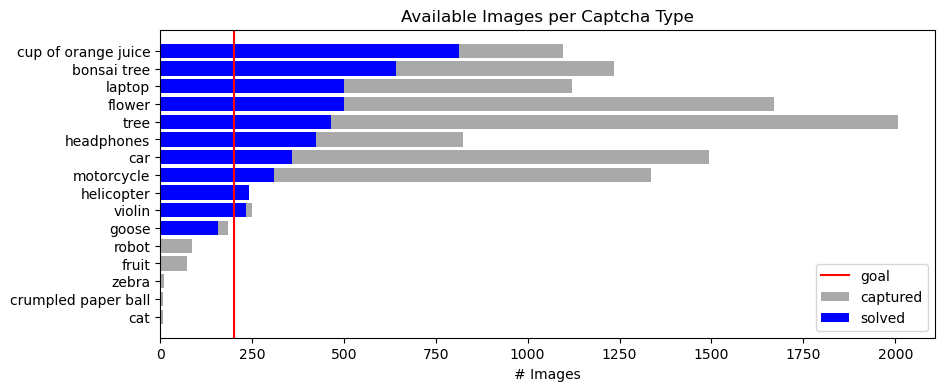

In [36]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [42]:
model_info = db1.get_model_info()
model_info

,date,path,training_samples,testing_samples,accuracy,better_than_90,better_than_95
cup of orange juice,2023-08-15,cup of orange juice/23-227_01,192,83,1.000000,1.000000,1.000000
laptop,2023-08-15,laptop/23-227_03,368,133,0.984962,0.999987,0.991284
car,2023-08-15,car/23-227_01,256,103,0.980583,0.999759,0.967406
motorcycle,2023-08-15,motorcycle/23-227_01,224,85,0.976471,0.998653,0.930050
tree,2023-08-15,tree/23-227_01,336,128,0.968750,0.999188,0.887323
headphones,2023-08-16,headphones/23-228_01,304,121,0.966942,0.998549,0.859937
flower,2023-08-15,flower/23-227_01,368,132,0.931818,0.920240,0.216006
bonsai tree,2023-08-15,bonsai tree/23-227_01,480,162,0.913580,0.754704,0.033359
helicopter,2023-08-15,helicopter/23-227_01,176,66,0.893939,0.494087,0.046416
violin,2023-08-15,violin/23-227_01,176,59,0.830508,0.066589,0.000644


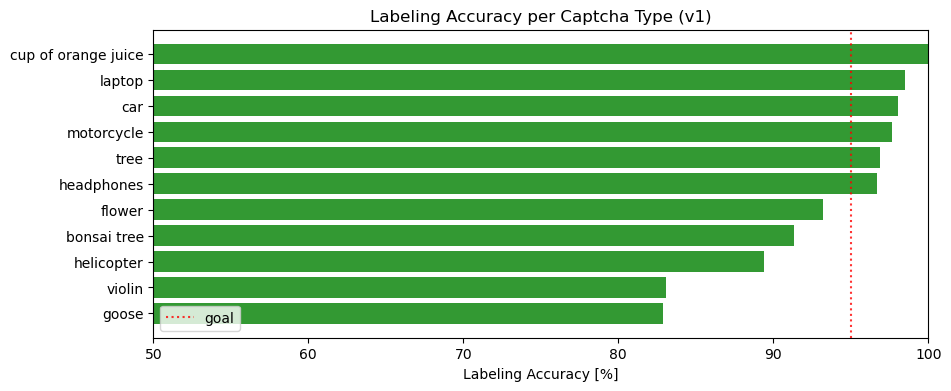

In [43]:
%run visualizer.py
plot_model_accuracy(model_info)

In [44]:
db1.load_models_into_src(threshold=0.9)

cup of orange juice cup of orange juice/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
laptop laptop/23-227_03
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
car car/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
motorcycle motorcycle/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle
tree tree/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//tree
headphones headphones/23-228_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
flower flower/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
bonsai tree bonsai tree/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree


In [40]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=100, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-34-602646.png
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-40-253823.png
Captcha V1
cup of orange juice: Added 6 rows to db
Captcha V1
cup of orange juice: Saved 6 images to disk
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-48-654054.png
Captcha V1
headphones      : Added 9 rows to db
Captcha V1
headphones      : Saved 9 images to disk
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-54-500926.png
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to

ERROR: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.96)
Stacktrace:
	GetHandleVerifier [0x00007FF7DB8052A2+57122]
	(No symbol) [0x00007FF7DB77EA92]
	(No symbol) [0x00007FF7DB64E3AB]
	(No symbol) [0x00007FF7DB62E1B9]
	(No symbol) [0x00007FF7DB6AB417]
	(No symbol) [0x00007FF7DB6BE24F]
	(No symbol) [0x00007FF7DB6A6DB3]
	(No symbol) [0x00007FF7DB67D2B1]
	(No symbol) [0x00007FF7DB67E494]
	GetHandleVerifier [0x00007FF7DBAAEF82+2849794]
	GetHandleVerifier [0x00007FF7DBB01D24+3189156]
	GetHandleVerifier [0x00007FF7DBAFACAF+3160367]
	GetHandleVerifier [0x00007FF7DB896D06+653702]
	(No symbol) [0x00007FF7DB78A208]
	(No symbol) [0x00007FF7DB7862C4]
	(No symbol) [0x00007FF7DB7863F6]
	(No symbol) [0x00007FF7DB7767A3]
	BaseThreadInitThunk [0x00007FFE71B27034+20]
	RtlUserThreadStart [0x00007FFE71C62651+33]

Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chro

In [41]:
%run pytorch_training.py
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=10)
train_models_on_all_captcha_strings(db1, threshold=200, save=True)

Training model on cup of orange juice with 814 samples...
Training model on cup of orange juice...
Fount 415 useable images
x shape: (415, 3, 128, 128)
y shape: (415, 1)
train size: 304, test size: 111
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0035, Accuracy: 97/111, 87.39%
Epoch: 2, Test Loss: 0.0034, Accuracy: 97/111, 87.39%
Epoch: 3, Test Loss: 0.0033, Accuracy: 97/111, 87.39%
Epoch: 4, Test Loss: 0.0032, Accuracy: 97/111, 87.39%
Epoch: 5, Test Loss: 0.0027, Accuracy: 97/111, 87.39%
Epoch: 6, Test Loss: 0.0020, Accuracy: 97/111, 87.39%
Epoch: 7, Test Loss: 0.0016, Accuracy: 100/111, 90.09%
Epoch: 8, Test Loss: 0.0014, Accuracy: 109/111, 98.20%
Epoch: 9, Test Loss: 0.0014, Accuracy: 108/111, 97.30%
Epoch: 10, Test Loss: 0.0014, Accuracy: 109/111, 98.20%
Epoch: 11, Test Loss: 0.0015, Accuracy: 108/111, 97.30%
Epoch: 12, Test Loss: 0.0014, Accuracy: 107/111, 96.40%
Epoch: 13, Test Loss: 0.0013, Accuracy: 108/111, 97.30%
Epoch: 14, Test Loss: 0.0014, Accurac

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

Setting images for tree
Setting images for cup of orange juice
labeled cup of orange juice/13-13-14-02-416897_1.png as False
labeled cup of orange juice/13-13-24-26-351884_8.png as False
labeled cup of orange juice/13-13-33-59-481223_3.png as True
labeled cup of orange juice/13-13-34-38-315627_7.png as True
labeled cup of orange juice/13-13-39-43-913005_7.png as False
labeled cup of orange juice/13-13-41-53-089875_4.png as True
labeled cup of orange juice/13-13-51-05-751911_3.png as True
labeled cup of orange juice/14-22-13-56-614958_2.png as True
labeled cup of orange juice/15-17-06-11-361993_3.png as True
Setting images for cup of orange juice
labeled cup of orange juice/13-13-05-36-175551_7.png as False
labeled cup of orange juice/13-13-13-26-510037_0.png as False
labeled cup of orange juice/13-13-13-57-018122_4.png as False
labeled cup of orange juice/13-13-18-27-329967_4.png as True
labeled cup of orange juice/13-13-24-03-712917_8.png as False
labeled cup of orange juice/13-14-01-

C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-02-975213_3.png as True
labeled cup of orange juice/13-01-35-29-598480_2.png as False
labeled cup of orange juice/13-12-59-24-785717_3.png as False
labeled cup of orange juice/13-13-04-04-017508_4.png as True
labeled cup of orange juice/13-13-07-29-625582_7.png as True
labeled cup of orange juice/13-13-14-34-910802_8.png as False
labeled cup of orange juice/13-14-01-55-974716_1.png as False
labeled cup of orange juice/15-17-05-56-065082_7.png as True
labeled cup of orange juice/15-17-05-56-065082_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-34-43-205219_8.png as False
labeled cup of orange juice/13-13-02-08-618146_5.png as False
labeled cup of orange juice/13-13-46-11-937452_0.png as True
labeled cup of orange juice/13-13-49-43-353104_5.png as True
labeled cup of orange juice/13-13-59-24-579798_5.png as False
labeled cup of orange juice/15-11-21-20-084556_2.png as False
labeled cup of orange juice/15-17-05-56-873103_0.png as True
labeled cup of orange juice/15-17-05-58-224596_6.png as False
labeled cup of orange juice/15-17-06-11-361993_2.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-38-29-118485_7.png as False
labeled cup of orange juice/13-12-25-35-667771_2.png as True
labeled cup of orange juice/13-12-29-19-889583_1.png as True
labeled cup of orange juice/13-13-15-36-538813_1.png as False
labeled cup of orange juice/13-13-31-56-264367_7.png as True
labeled cup of orange juice/13-13-37-42-084345_6.png as True
labeled cup of orange juice/13-13-56-03-105111_0.png as True
labeled cup of orange juice/14-22-25-20-699944_7.png as False
labeled cup of orange juice/15-17-05-58-224596_4.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-38-28-236476_1.png as True
labeled cup of orange juice/13-01-41-21-892757_0.png as True
labeled cup of orange juice/13-13-11-56-634335_7.png as False
labeled cup of orange juice/13-13-14-02-416897_0.png as False
labeled cup of orange juice/13-13-33-03-244081_1.png as False
labeled cup of orange juice/13-13-33-59-481223_2.png as False
labeled cup of orange juice/13-13-47-42-944785_7.png as False
labeled cup of orange juice/14-22-13-56-614958_0.png as False
labeled cup of orange juice/15-17-05-55-394100_7.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-34-43-205219_0.png as False
labeled cup of orange juice/13-12-25-45-721327_5.png as False
labeled cup of orange juice/13-12-29-19-889583_5.png as True
labeled cup of orange juice/13-12-58-09-294501_8.png as False
labeled cup of orange juice/13-13-33-09-594522_1.png as False
labeled cup of orange juice/13-13-35-25-985399_7.png as False
labeled cup of orange juice/13-13-40-19-119818_0.png as True
labeled cup of orange juice/13-13-52-40-039934_0.png as True
labeled cup of orange juice/15-17-06-11-361993_0.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-30-266219_3.png as True
labeled cup of orange juice/13-13-05-36-175551_2.png as True
labeled cup of orange juice/13-13-11-56-634335_5.png as True
labeled cup of orange juice/13-13-23-57-169224_0.png as False
labeled cup of orange juice/13-13-45-22-868122_7.png as False
labeled cup of orange juice/13-13-50-51-071947_4.png as True
labeled cup of orange juice/14-22-39-37-018165_7.png as False
labeled cup of orange juice/15-17-05-58-224596_5.png as True
labeled cup of orange juice/16-10-01-46-856755_2.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-27-25-461415_0.png as False
labeled cup of orange juice/13-13-01-45-306092_3.png as False
labeled cup of orange juice/13-13-01-59-946087_2.png as True
labeled cup of orange juice/13-13-07-52-340113_7.png as True
labeled cup of orange juice/13-13-10-42-739381_1.png as True
labeled cup of orange juice/13-13-11-56-634335_2.png as False
labeled cup of orange juice/13-13-26-01-112767_0.png as False
labeled cup of orange juice/13-14-01-55-974716_3.png as False
labeled cup of orange juice/15-17-05-56-873103_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-57-630854_3.png as True
labeled cup of orange juice/13-01-38-28-236476_5.png as True
labeled cup of orange juice/13-01-40-12-404432_4.png as False
labeled cup of orange juice/13-12-25-45-721327_3.png as False
labeled cup of orange juice/13-13-24-14-799619_1.png as True
labeled cup of orange juice/13-13-33-14-282096_3.png as False
labeled cup of orange juice/13-13-42-15-366083_4.png as False
labeled cup of orange juice/14-22-13-56-614958_3.png as True
labeled cup of orange juice/15-17-05-58-224596_7.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-00-59-32-527793_7.png as True
labeled cup of orange juice/13-01-02-39-245503_3.png as True
labeled cup of orange juice/13-01-38-28-236476_0.png as True
labeled cup of orange juice/13-12-59-49-196263_1.png as False
labeled cup of orange juice/13-13-06-42-796314_2.png as True
labeled cup of orange juice/13-13-34-28-112069_4.png as False
labeled cup of orange juice/13-14-00-26-254324_3.png as True
labeled cup of orange juice/13-14-02-58-468433_8.png as True
labeled cup of orange juice/14-22-39-37-018165_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-00-59-32-527793_3.png as False
labeled cup of orange juice/13-01-35-34-247454_0.png as False
labeled cup of orange juice/13-13-06-57-139565_4.png as False
labeled cup of orange juice/13-13-16-03-556516_4.png as True
labeled cup of orange juice/13-13-16-15-084090_2.png as True
labeled cup of orange juice/13-13-25-44-368209_2.png as False
labeled cup of orange juice/13-13-25-44-368209_6.png as True
labeled cup of orange juice/13-13-41-53-089875_3.png as False
labeled cup of orange juice/13-14-01-24-099626_4.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-29-19-889583_4.png as False
labeled cup of orange juice/13-13-14-02-416897_2.png as False
labeled cup of orange juice/13-13-33-09-594522_3.png as False
labeled cup of orange juice/13-13-33-52-028389_2.png as True
labeled cup of orange juice/13-13-37-50-669638_7.png as True
labeled cup of orange juice/13-13-51-00-144945_3.png as True
labeled cup of orange juice/13-13-55-36-908134_7.png as True
labeled cup of orange juice/14-22-13-56-614958_4.png as True
labeled cup of orange juice/15-17-06-11-361993_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-02-39-245503_8.png as False
labeled cup of orange juice/13-01-39-45-981117_6.png as True
labeled cup of orange juice/13-12-27-15-337307_8.png as True
labeled cup of orange juice/13-13-07-55-014054_6.png as False
labeled cup of orange juice/13-13-35-22-314772_7.png as True
labeled cup of orange juice/13-13-37-50-669638_3.png as True
labeled cup of orange juice/13-13-55-05-236089_4.png as False
labeled cup of orange juice/14-22-13-56-614958_5.png as True
labeled cup of orange juice/15-11-21-20-084556_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-02-39-245503_5.png as True
labeled cup of orange juice/13-01-35-57-630854_1.png as False
labeled cup of orange juice/13-01-35-57-630854_5.png as False
labeled cup of orange juice/13-01-40-01-139407_7.png as False
labeled cup of orange juice/13-12-27-15-337307_3.png as False
labeled cup of orange juice/13-13-16-09-835012_8.png as False
labeled cup of orange juice/13-13-46-12-815789_1.png as True
labeled cup of orange juice/14-22-29-52-649278_5.png as True
labeled cup of orange juice/14-22-29-52-649278_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-00-28-914178_6.png as True
labeled cup of orange juice/13-01-41-21-012113_0.png as True
labeled cup of orange juice/13-12-27-10-392179_5.png as False
labeled cup of orange juice/13-13-04-35-479396_4.png as False
labeled cup of orange juice/13-13-25-44-368209_1.png as False
labeled cup of orange juice/13-13-25-44-368209_7.png as False
labeled cup of orange juice/13-13-39-10-496366_7.png as False
labeled cup of orange juice/13-13-54-23-825326_5.png as True
labeled cup of orange juice/13-13-56-02-259540_7.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-02-48-125915_2.png as True
labeled cup of orange juice/13-01-38-29-118485_0.png as True
labeled cup of orange juice/13-12-27-38-840733_6.png as True
labeled cup of orange juice/13-13-11-31-683473_4.png as False
labeled cup of orange juice/13-13-17-14-321665_5.png as False
labeled cup of orange juice/13-13-39-43-913005_0.png as False
labeled cup of orange juice/13-13-54-45-011907_6.png as False
labeled cup of orange juice/13-14-01-00-616471_0.png as True
labeled cup of orange juice/15-17-05-56-065082_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-09-294501_1.png as False
labeled cup of orange juice/13-13-03-21-581373_1.png as True
labeled cup of orange juice/13-13-06-42-796314_5.png as False
labeled cup of orange juice/13-13-13-57-018122_1.png as True
labeled cup of orange juice/13-13-15-36-538813_2.png as True
labeled cup of orange juice/13-13-32-42-841214_2.png as False
labeled cup of orange juice/13-13-37-09-469648_6.png as False
labeled cup of orange juice/13-13-46-11-937452_2.png as False
labeled cup of orange juice/13-13-46-13-736665_1.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-02-975213_6.png as False
labeled cup of orange juice/13-01-35-57-630854_2.png as False
labeled cup of orange juice/13-13-05-17-633667_2.png as False
labeled cup of orange juice/13-13-05-36-175551_6.png as False
labeled cup of orange juice/13-13-14-34-910802_6.png as False
labeled cup of orange juice/13-13-34-29-898181_4.png as False
labeled cup of orange juice/13-13-52-25-497120_0.png as False
labeled cup of orange juice/13-13-54-21-267000_1.png as False
labeled cup of orange juice/14-22-30-51-560992_3.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-54-104018_1.png as False
labeled cup of orange juice/13-13-07-55-014054_3.png as True
labeled cup of orange juice/13-13-10-09-453552_4.png as True
labeled cup of orange juice/13-13-16-09-835012_1.png as True
labeled cup of orange juice/13-13-26-15-534851_0.png as True
labeled cup of orange juice/13-13-31-41-465909_8.png as False
labeled cup of orange juice/13-13-59-23-692066_4.png as False
labeled cup of orange juice/14-22-29-52-649278_1.png as False
labeled cup of orange juice/15-11-21-20-084556_4.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-00-28-914178_2.png as True
labeled cup of orange juice/13-12-58-59-996269_0.png as False
labeled cup of orange juice/13-12-58-59-996269_6.png as False
labeled cup of orange juice/13-13-31-41-465909_6.png as True
labeled cup of orange juice/13-13-41-24-317119_6.png as True
labeled cup of orange juice/13-13-58-10-837075_3.png as False
labeled cup of orange juice/14-22-25-20-699944_6.png as False
labeled cup of orange juice/14-22-30-51-560992_5.png as False
labeled cup of orange juice/14-22-39-37-018165_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-00-28-914178_0.png as False
labeled cup of orange juice/13-12-27-10-392179_3.png as False
labeled cup of orange juice/13-12-58-08-471641_7.png as False
labeled cup of orange juice/13-13-06-57-139565_8.png as True
labeled cup of orange juice/13-13-41-28-543213_1.png as True
labeled cup of orange juice/13-14-02-58-468433_6.png as False
labeled cup of orange juice/13-14-05-56-891603_4.png as False
labeled cup of orange juice/14-22-29-52-649278_3.png as True
labeled cup of orange juice/15-17-05-56-065082_5.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-34-247454_1.png as True
labeled cup of orange juice/13-12-27-38-840733_5.png as False
labeled cup of orange juice/13-12-59-14-842639_1.png as True
labeled cup of orange juice/13-12-59-49-196263_0.png as False
labeled cup of orange juice/13-13-17-14-321665_6.png as False
labeled cup of orange juice/13-13-24-15-687420_8.png as False
labeled cup of orange juice/13-13-33-41-761348_3.png as False
labeled cup of orange juice/15-17-05-55-394100_8.png as True
labeled cup of orange juice/15-17-05-56-873103_4.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-34-43-205219_4.png as True
labeled cup of orange juice/13-01-39-33-725973_7.png as False
labeled cup of orange juice/13-01-41-11-307297_2.png as True
labeled cup of orange juice/13-12-26-13-009725_0.png as True
labeled cup of orange juice/13-12-27-15-337307_0.png as True
labeled cup of orange juice/13-12-59-14-842639_3.png as True
labeled cup of orange juice/13-13-17-45-232802_4.png as True
labeled cup of orange juice/13-13-46-04-005648_0.png as False
labeled cup of orange juice/13-13-55-41-855895_4.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-57-630854_8.png as True
labeled cup of orange juice/13-12-59-06-088219_8.png as False
labeled cup of orange juice/13-13-11-31-683473_8.png as True
labeled cup of orange juice/13-13-11-56-634335_4.png as True
labeled cup of orange juice/13-13-16-15-084090_6.png as True
labeled cup of orange juice/13-13-16-22-150354_2.png as False
labeled cup of orange juice/13-13-33-09-594522_2.png as True
labeled cup of orange juice/13-13-54-13-969599_8.png as True
labeled cup of orange juice/13-13-58-31-145098_0.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-38-34-551789_2.png as True
labeled cup of orange juice/13-13-02-47-712888_5.png as True
labeled cup of orange juice/13-13-32-48-251380_2.png as True
labeled cup of orange juice/13-13-45-22-868122_6.png as False
labeled cup of orange juice/13-13-52-29-439159_1.png as True
labeled cup of orange juice/13-13-52-29-439159_5.png as True
labeled cup of orange juice/13-13-59-24-579798_7.png as True
labeled cup of orange juice/13-14-00-50-749297_1.png as False
labeled cup of orange juice/14-22-25-20-699944_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-39-32-864806_4.png as False
labeled cup of orange juice/13-12-26-13-009725_6.png as True
labeled cup of orange juice/13-12-27-10-392179_4.png as False
labeled cup of orange juice/13-12-58-09-294501_0.png as False
labeled cup of orange juice/13-13-11-56-634335_1.png as True
labeled cup of orange juice/13-13-13-36-825082_5.png as True
labeled cup of orange juice/13-13-32-57-058302_0.png as True
labeled cup of orange juice/13-13-41-24-317119_5.png as True
labeled cup of orange juice/13-13-58-31-145098_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-38-34-551789_6.png as True
labeled cup of orange juice/13-13-16-48-286183_8.png as False
labeled cup of orange juice/13-13-41-53-089875_1.png as False
labeled cup of orange juice/13-13-46-03-016164_5.png as False
labeled cup of orange juice/13-13-53-13-464698_0.png as True
labeled cup of orange juice/13-13-58-10-837075_5.png as False
labeled cup of orange juice/13-14-00-50-749297_3.png as False
labeled cup of orange juice/14-22-13-56-614958_1.png as False
labeled cup of orange juice/14-22-39-37-018165_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-59-996269_2.png as True
labeled cup of orange juice/13-13-02-46-923644_8.png as False
labeled cup of orange juice/13-13-02-58-774925_6.png as False
labeled cup of orange juice/13-13-07-29-625582_2.png as True
labeled cup of orange juice/13-13-16-28-004494_8.png as True
labeled cup of orange juice/14-22-30-51-560992_4.png as False
labeled cup of orange juice/15-17-05-56-065082_2.png as False
labeled cup of orange juice/15-17-06-11-361993_4.png as False
labeled cup of orange juice/15-17-06-11-361993_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-35-02-975213_1.png as False
labeled cup of orange juice/13-01-41-21-012113_5.png as True
labeled cup of orange juice/13-13-02-58-774925_8.png as True
labeled cup of orange juice/13-13-06-42-796314_3.png as True
labeled cup of orange juice/13-13-26-01-112767_6.png as False
labeled cup of orange juice/13-13-37-42-084345_1.png as True
labeled cup of orange juice/13-13-54-21-267000_6.png as False
labeled cup of orange juice/14-22-39-37-018165_4.png as False
labeled cup of orange juice/15-17-05-56-873103_2.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))